In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#generate some data
np.random.seed(42)
data= np.concatenate([np.random.normal(0, 1, 500),np.random.normal(5, 1, 500)])

In [3]:
data.shape

(1000,)

In [4]:
#Reshape the data to meet the input requirements of sklearn
data= data.reshape(-1,1)
data.shape

(1000, 1)

In [5]:
from sklearn.neighbors import KernelDensity
#create a kernel density estimator
kde=KernelDensity(kernel='gaussian', bandwidth=1.0)

In [6]:
# Fit the data to the estimator
kde.fit(data)

KernelDensity()

In [7]:
max(data)

array([7.63238206])

In [8]:
# generate a range of values for the x-axis
x_vals = np.linspace(min(data),max(data),1000).reshape(-1,1)

In [9]:
# Use the KDE to estimate the density for each x value
log_densities = kde.score_samples(x_vals)
densities = np.exp(log_densities)

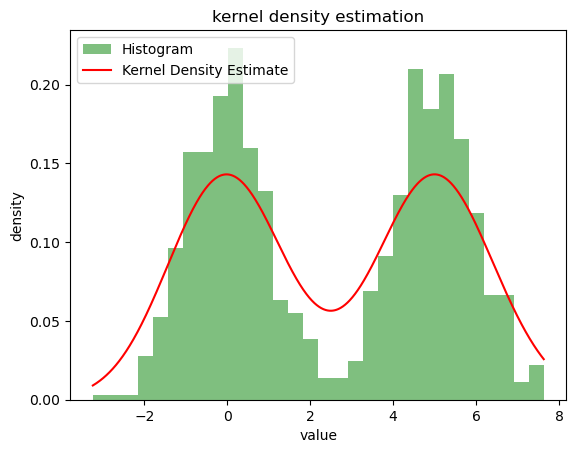

In [10]:
#plot the original data and the KDE estimate
plt.hist(data,bins=30,density=True,alpha=0.5,color='green',label='Histogram')
plt.plot(x_vals,densities,color='red',label='Kernel Density Estimate')
plt.legend()
plt.title('kernel density estimation')
plt.xlabel('value')
plt.ylabel('density')
plt.show()

In [11]:
#Create a kernel density estimator
kde = KernelDensity(bandwidth=1.0,kernel='cosine')
 #fit the data to the estimator
kde.fit(data)

KernelDensity(kernel='cosine')

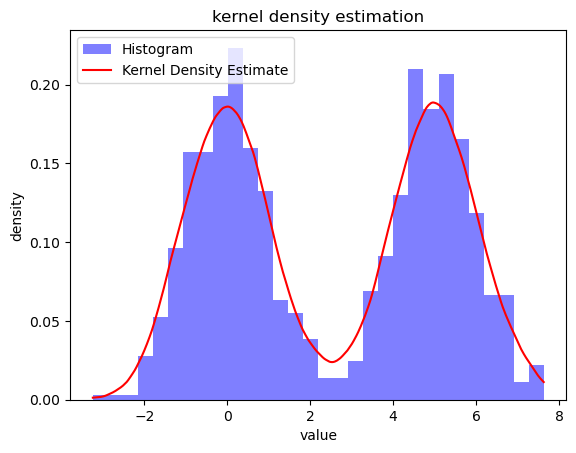

In [12]:
# Use the KDE to estimate the density for each x value
log_densities = kde.score_samples(x_vals)
densities = np.exp(log_densities)

#plot the original data and the KDE estimate
plt.hist(data,bins=30,density=True,alpha=0.5,color='blue',label='Histogram')
plt.plot(x_vals,densities,color='red',label='Kernel Density Estimate')
plt.legend()
plt.title('kernel density estimation')
plt.xlabel('value')
plt.ylabel('density')
plt.show()

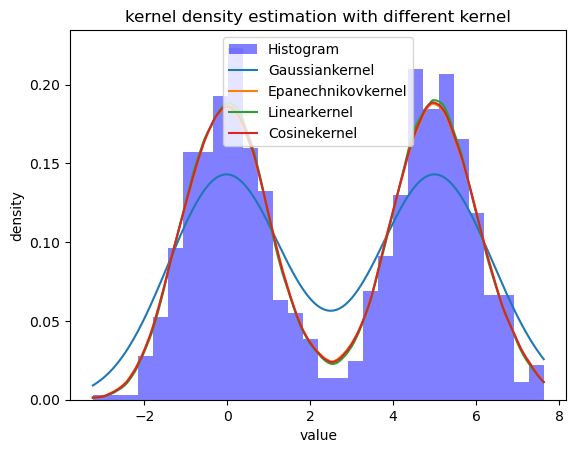

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

#generate some data
np.random.seed(42)
data= np.concatenate([np.random.normal(0, 1, 500),np.random.normal(5, 1, 500)])
data = data.reshape(-1,1)

#create a range  of value for the x -axis
x_vals = np.linspace(min(data),max(data),1000).reshape(-1,1)

#list of kernels
kernels = ['gaussian','epanechnikov','linear','cosine']

# plot kde for each kernel
plt.figure(figure=(10,6))
plt.hist(data,bins=30,density=True, alpha=0.5,color= 'blue',label='Histogram')

for kernel in kernels:
    #creaate a KDE with the specified kernel
    kde= KernelDensity(bandwidth=1.0, kernel = kernel)
    kde.fit(data)

    #use the kde to estimate the density for each x vlaue
    log_densities=kde.score_samples(x_vals)
    densities = np.exp(log_densities)

    #plot the KDE estimate for the current kernel
    plt.plot(x_vals, densities, label=f'{kernel.capitalize()}kernel')

plt.legend()
plt.title('kernel density estimation with different kernel')
plt.xlabel('value')
plt.ylabel('density')
plt.show()
    